# **Evidencia 2. Análisis de Aprendizaje Automático**

- Integrantes DATASTORM:
  - Leonardo Antonio Espinosa // A01710961

  - Adrián Rodríguez González // A01710823

  - Andrea Cristina Ramírez Parra // A01749899

  - Jorge Emiliano Pomar // A01709338

- Fecha de entrega: 31 de mayo de 2025

## **I. Análisis Exploratorio de Datos (EDA) y Definición del Proyecto**

- Análisis Exploratorio de Datos (EDA): Documenta tus hallazgos clave del EDA. Aunque los datos estén preprocesados, es esencial comprender la distribución de las variables, identificar posibles desequilibrios en la variable objetivo (credit_score) y entender las relaciones entre las características. Incluye visualizaciones relevantes que respalden tus observaciones.

- Objetivos de la Modelación: Define claramente los objetivos de tu modelo. ¿Qué se espera lograr con la clasificación del puntaje crediticio?

- Metodología CRISP-DM: Explica brevemente cómo las fases de Comprensión de los Datos y Comprensión del Negocio de la metodología CRISP-DM se aplicaron en esta sección.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv("Credit_Score.csv")
df

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99996,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99997,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99998,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               100000 non-null  int64  
 1   annual_income                     100000 non-null  float64
 2   monthly_inhand_salary             100000 non-null  float64
 3   num_bank_accounts                 100000 non-null  int64  
 4   num_credit_card                   100000 non-null  int64  
 5   interest_rate                     100000 non-null  int64  
 6   num_of_loan                       100000 non-null  int64  
 7   delay_from_due_date               100000 non-null  int64  
 8   num_of_delayed_payment            100000 non-null  int64  
 9   changed_credit_limit              100000 non-null  float64
 10  num_credit_inquiries              100000 non-null  int64  
 11  outstanding_debt                  100000 non-null  fl

In [4]:
mean_values = df.mean(numeric_only=True)
print(mean_values)

age                                    33.274560
annual_income                       50505.123449
monthly_inhand_salary                4197.534569
num_bank_accounts                       5.631200
num_credit_card                         5.532800
interest_rate                          14.532080
num_of_loan                             3.989200
delay_from_due_date                    21.054240
num_of_delayed_payment                 13.278640
changed_credit_limit                   10.394631
num_credit_inquiries                   61.787200
outstanding_debt                     1426.220376
credit_utilization_ratio               32.285173
credit_history_age                    220.156240
total_emi_per_month                   114.001206
amount_invested_monthly               195.539460
monthly_balance                       402.551259
credit_mix_good                         0.303840
credit_mix_standard                     0.458480
month_august                            0.125000
month_february      

In [5]:
median_values = df.median(numeric_only=True)
print(median_values)

age                                    33.00000
annual_income                       36999.70500
monthly_inhand_salary                3092.27000
num_bank_accounts                       6.00000
num_credit_card                         5.00000
interest_rate                          13.00000
num_of_loan                             4.00000
delay_from_due_date                    18.00000
num_of_delayed_payment                 14.00000
changed_credit_limit                    9.34000
num_credit_inquiries                   60.00000
outstanding_debt                     1166.15500
credit_utilization_ratio               32.30580
credit_history_age                    216.00000
total_emi_per_month                    76.38940
amount_invested_monthly               143.12790
monthly_balance                       338.67215
credit_mix_good                         0.00000
credit_mix_standard                     0.00000
month_august                            0.00000
month_february                          

In [6]:
mode_values = df.mode().iloc[0]
print(mode_values)

age                                   31.0000
annual_income                       9141.6300
monthly_inhand_salary                536.4312
num_bank_accounts                      6.0000
num_credit_card                        5.0000
interest_rate                          8.0000
num_of_loan                            4.0000
delay_from_due_date                   15.0000
num_of_delayed_payment                10.0000
changed_credit_limit                   8.2200
num_credit_inquiries                  60.0000
outstanding_debt                     460.4600
credit_utilization_ratio              32.4486
credit_history_age                   190.0000
total_emi_per_month                   76.3894
amount_invested_monthly              195.5395
monthly_balance                      402.5513
credit_mix_good                        0.0000
credit_mix_standard                    0.0000
month_august                           0.0000
month_february                         0.0000
month_january                     

In [7]:
# desviación estandar
std_values = df.std(numeric_only=True)
print(std_values)

age                                    10.764438
annual_income                       38299.422093
monthly_inhand_salary                3187.289267
num_bank_accounts                       2.325141
num_credit_card                         2.067657
interest_rate                           8.741330
num_of_loan                             2.092235
delay_from_due_date                    14.757481
num_of_delayed_payment                  6.187195
changed_credit_limit                    6.511296
num_credit_inquiries                   35.162512
outstanding_debt                     1155.129026
credit_utilization_ratio                5.116875
credit_history_age                     99.580975
total_emi_per_month                   120.902311
amount_invested_monthly               190.598136
monthly_balance                       212.628374
credit_mix_good                         0.459917
credit_mix_standard                     0.498276
month_august                            0.330721
month_february      

In [8]:
# Coeficiente de variación
cv_values = (std_values / mean_values) * 100
print(cv_values)

age                                  32.350356
annual_income                        75.832746
monthly_inhand_salary                75.932413
num_bank_accounts                    41.290329
num_credit_card                      37.370903
interest_rate                        60.151955
num_of_loan                          52.447482
delay_from_due_date                  70.092678
num_of_delayed_payment               46.595096
changed_credit_limit                 62.640951
num_credit_inquiries                 56.909056
outstanding_debt                     80.992324
credit_utilization_ratio             15.848994
credit_history_age                   45.231956
total_emi_per_month                 106.053538
amount_invested_monthly              97.472979
monthly_balance                      52.820198
credit_mix_good                     151.368055
credit_mix_standard                 108.679899
month_august                        264.576454
month_february                      264.576454
month_january

In [ ]:
# UBICACIÓN - IQR

quantiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
quantiles

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0.25,24.0,19342.9725,1626.719825,4.0,4.0,7.0,2.0,10.0,9.0,5.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,33.0,36999.7050,3092.270000,6.0,5.0,13.0,4.0,18.0,14.0,9.3400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
0.75,42.0,71683.4700,5958.695625,7.0,7.0,20.0,5.0,28.0,18.0,14.6725,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


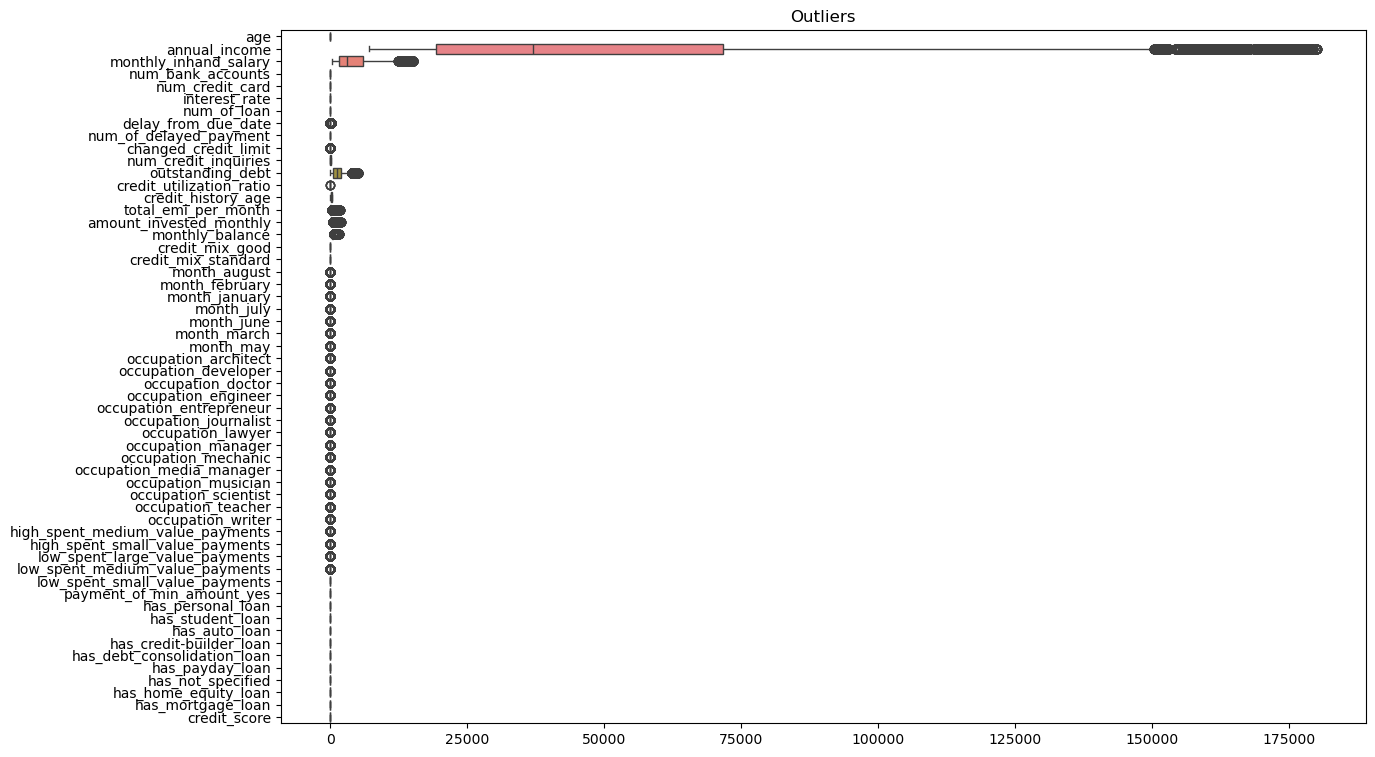

In [ ]:
# Outliers
plt.figure(figsize=(14, 9))
sns.boxplot(data=df, orient="h")
plt.title("Outliers")
plt.show()

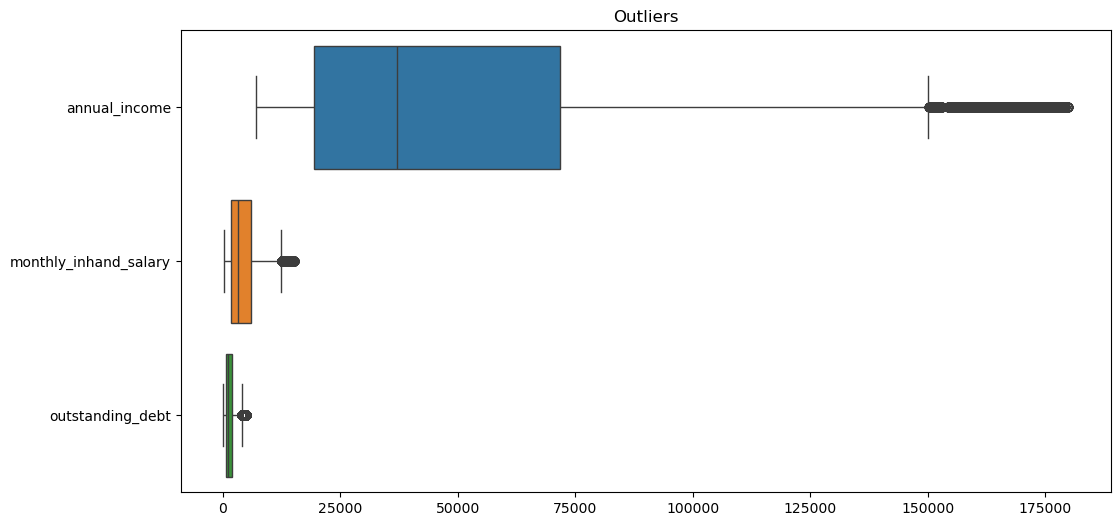

In [ ]:
# Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[["annual_income", "monthly_inhand_salary", "outstanding_debt"]], orient="h"
)
plt.title("Outliers")
plt.show()

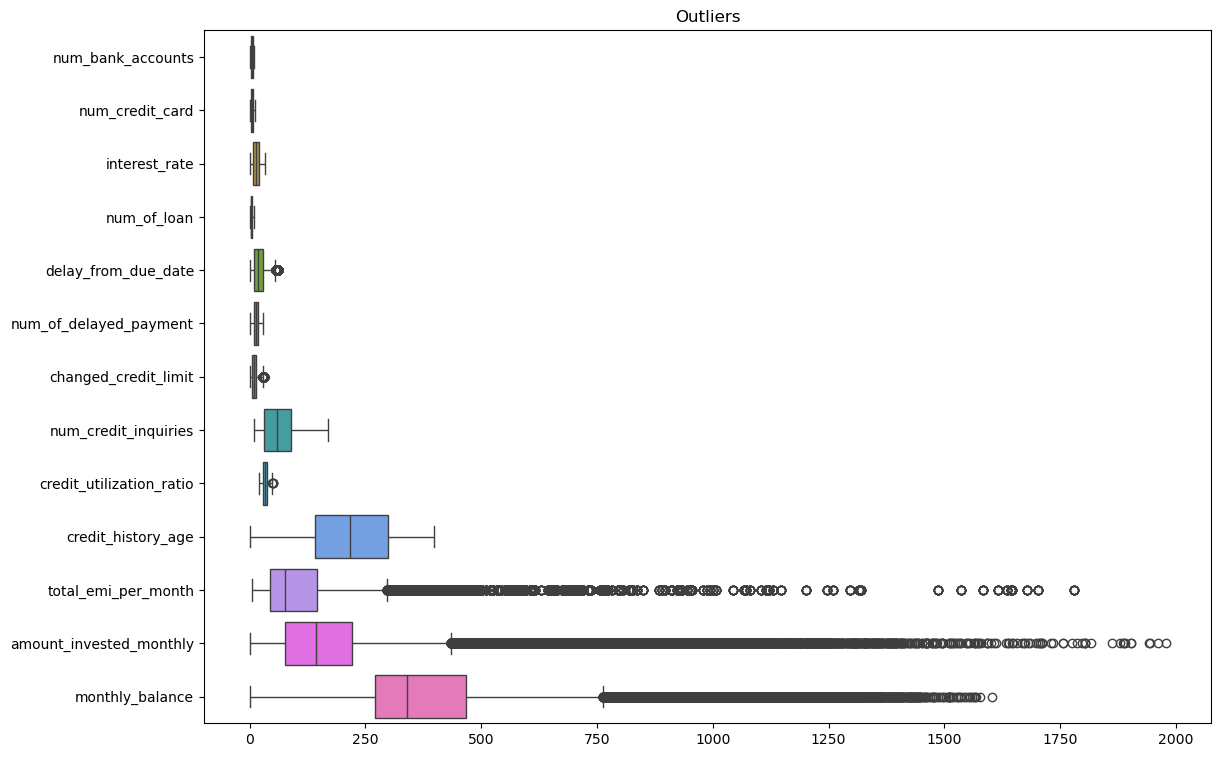

In [ ]:
# Outliers
plt.figure(figsize=(13, 9))
sns.boxplot(
    data=df[
        [
            "num_bank_accounts",
            "num_credit_card",
            "interest_rate",
            "num_of_loan",
            "delay_from_due_date",
            "num_of_delayed_payment",
            "changed_credit_limit",
            "num_credit_inquiries",
            "credit_utilization_ratio",
            "credit_history_age",
            "total_emi_per_month",
            "amount_invested_monthly",
            "monthly_balance",
        ]
    ],
    orient="h",
)
plt.title("Outliers")
plt.show()

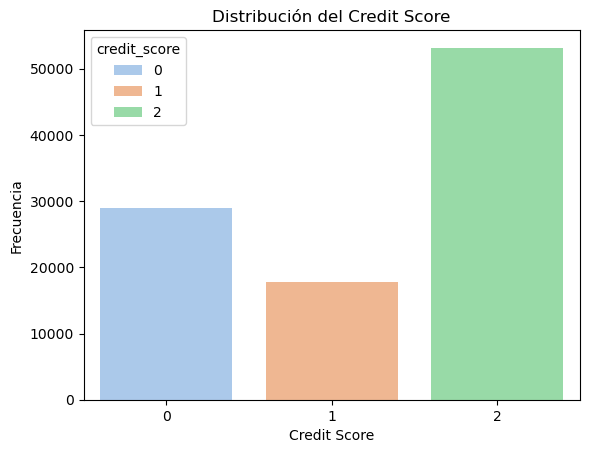

In [ ]:
# Deficiente --> 0, Bueno --> 1, Estándar --> 2
# gráfico barras por credit score

sns.countplot(x="credit_score", data=df, hue="credit_score", palette="pastel")
plt.title("Distribución del Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frecuencia")
plt.show()

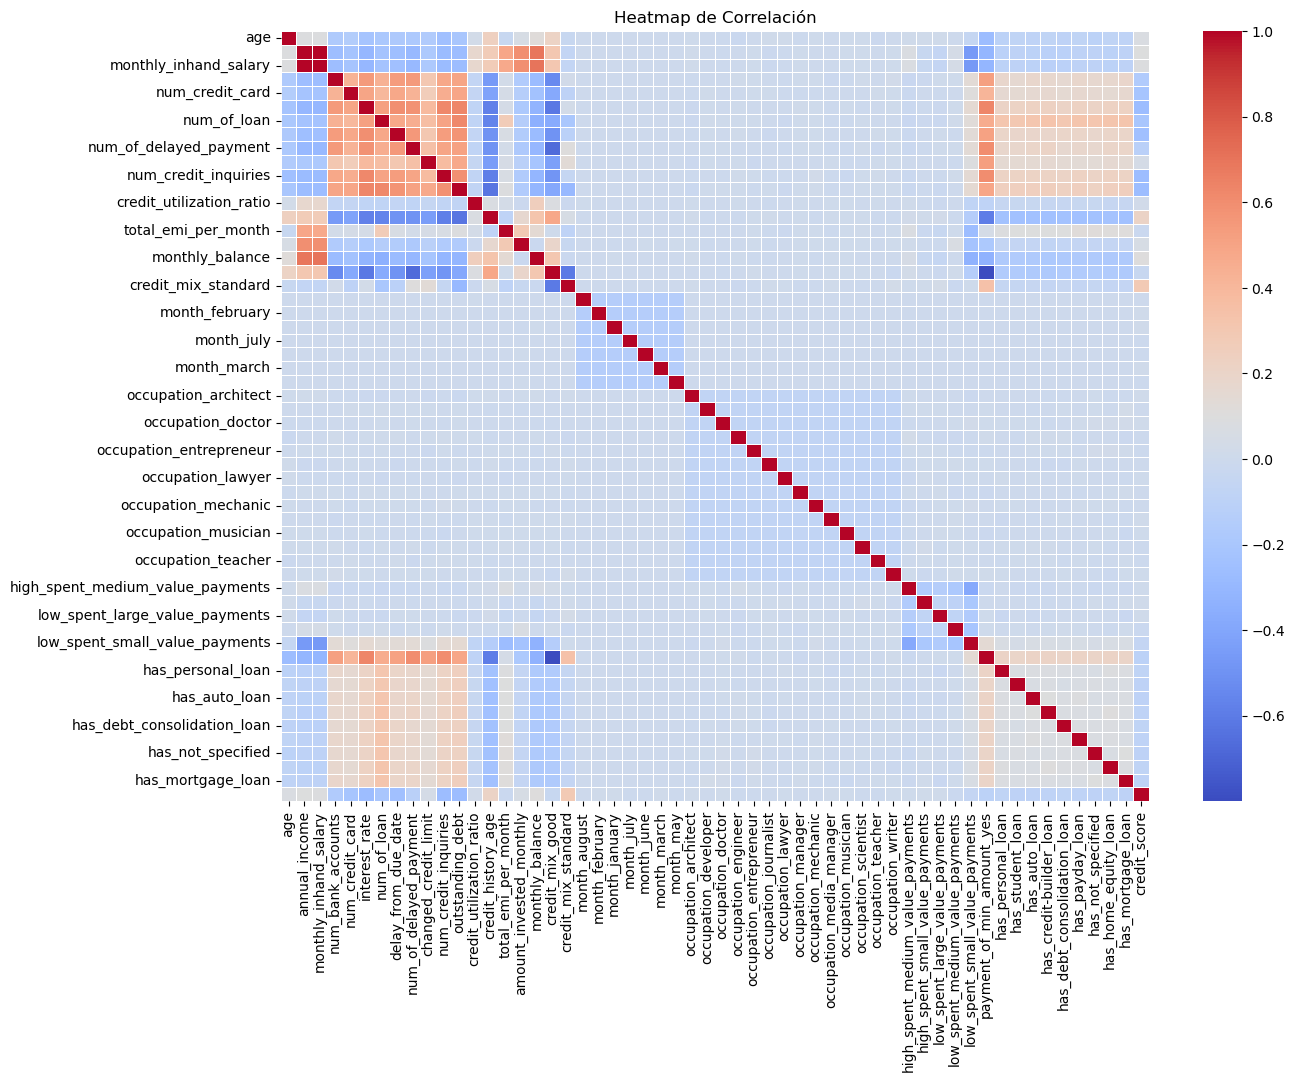

In [ ]:
# Heatmap de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

### **Resumen del EDA**
Para el análisis EDA se calcularon la media, mediana, moda, desviasión estándar, coeficiente de variación, nulos y outliers.

Por otro lado, para los outliers se encontraron valores atípicos en casi todas las variales, sin embargo, las más notorias fueron **_'annual_income', 'monthly_inhand_salary', 'outstanding_debt', 'total_emi_per_month', 'amount_invested_monthly','monthly_balance'_**

#### - **Principales hallazgos del EDA:**

  - La mayoría de las variables numéricas están muy dispersas.
  - Se identificaron outliers en casi todas las variables, especialmente en ingresos, deudas y balances mensuales.
  - El credit_score está desbalanceada, se inclina hacia valores estándar de crédito.
  - Las correlaciones más altas se observan entre variables financieras como ingresos, deudas y balances. Pero la verdad es que no hay correlaciones significativas como para indagar más a fondo.

#### - **Objetivos de la Modelación:**

  - Principalmente, queremos predecir el puntaje crediticio para que sea más facil identificar los clientes de alto y bajo perfil de riesgo. Así se podrían tomar decisiones informadas para saber si se le otorga o no un crédito a un cliente.

#### - **¿Cómo se aplica la Metodología CRISP-DM?:**
  - Se definió el objetivo de clasificar el riesgo crediticio para mejorar la gestión de créditos en el banco. En este caso, la comprensión del negocio se centra en entender cómo el puntaje crediticio afecta las decisiones de crédito y al banco en general.
  - Se realizó un análisis exploratorio detallado para comprender los datos en el sentido de la distribución, relaciones, variables relevantes, outliers y posibles sesgos.


## **II. Modelado de Aprendizaje Supervisado y Evaluación de Clasificación**

Definición de Métrica Objetivo: Antes de la evaluación, justifica la métrica de evaluación principal (e.g., F1-score, Recall, Precision) que consideras más crítica para este problema de negocio (por ejemplo, ¿es más costoso un falso positivo o un falso negativo para el banco?).


- **Métrica Objetivo:**
  - En este caso, la métrica más crítica es el F1-score. Decidimos usar esta porque es la que menos devastador sería para el banco, porque con f1 score podemos balancear entre precisión y recall y evitar caer en falsos negativos.


### Selección y Justificación de Modelos:

Experimenta con múltiples algoritmos de clasificación supervisada (por ejemplo: Nearest Centroids, K-Nearest Neighbors, Árboles de Decisión, Random Forest, SVM, Bagging, Boosting, etc).

A partir de tus experimentos, selecciona y presenta los 2 modelos de clasificación que demuestren el mejor rendimiento para la problemática de predicción del riesgo crediticio.

Justifica tu elección basándote en su desempeño, robustez, interpretabilidad y su idoneidad para el escenario bancario propuesto.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score

# Primero entrenamos todos los modelos
models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=50, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=30, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=30, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "NearestCentroid": NearestCentroid(),
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results[name] = {
        "f1_score": f1,
        "report": classification_report(y_test, y_pred, output_dict=True),
    }
    print(f"Modelo: {name}\nF1-score: {f1:.4f}")

Modelo: KNN
F1-score: 0.7322
Modelo: DecisionTree
F1-score: 0.7487
Modelo: RandomForest
F1-score: 0.8126
Modelo: Bagging
F1-score: 0.8143
Modelo: AdaBoost
F1-score: 0.6493
Modelo: SVM
F1-score: 0.4506
Modelo: NearestCentroid
F1-score: 0.2455


In [ ]:
# Selección de los 2 mejores modelos según F1-score
sorted_models = sorted(results.items(), key=lambda x: x[1]["f1_score"], reverse=True)
best_models = sorted_models[:2]

print("\n--- Mejores modelos ---")
for name, res in best_models:
    print(f"\nModelo: {name}")
    print(f"F1-score: {res['f1_score']:.4f}")
    # Regenerar las predicciones para el modelo correspondiente
    y_pred = models[name].predict(X_test)
    print(classification_report(y_test, y_pred))


--- Mejores modelos ---

Modelo: Bagging
F1-score: 0.8143
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      5799
           1       0.79      0.79      0.79      3566
           2       0.84      0.80      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000


Modelo: RandomForest
F1-score: 0.8126
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      5799
           1       0.79      0.77      0.78      3566
           2       0.83      0.81      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



### Evaluación Detallada 
Para los 2 modelos seleccionados, presenta un reporte de evaluación completo que incluya:

- Matriz de Confusión

- Métricas por clase: Accuracy, Precision, Recall y F1-score para cada categoría de credit_score.

- ROC/AUC

- Análisis comparativo del rendimiento entre los dos modelos elegidos.



Bagging


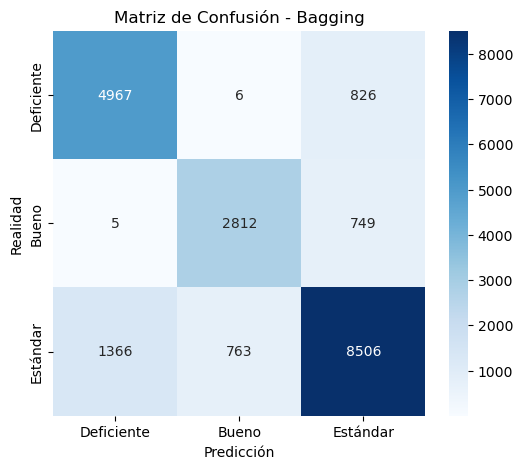

Reporte de Clasificación:
              precision    recall  f1-score   support

  Deficiente       0.78      0.86      0.82      5799
       Bueno       0.79      0.79      0.79      3566
    Estándar       0.84      0.80      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000

ROC AUC (macro, OVR): 0.9277


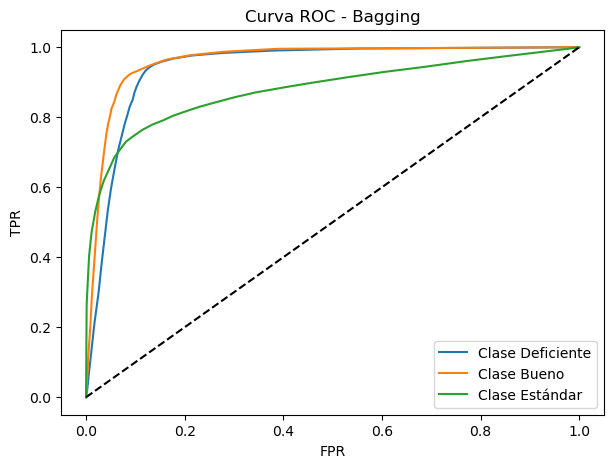


RandomForest


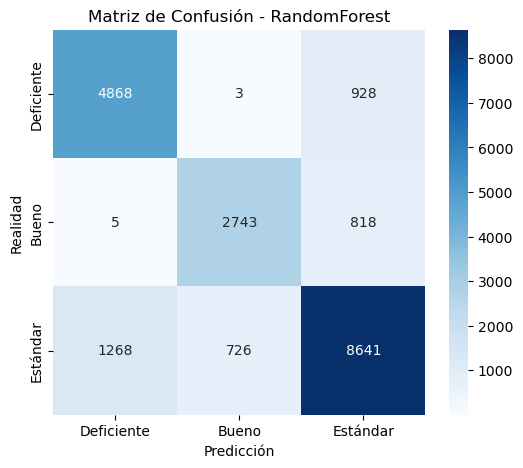

Reporte de Clasificación:
              precision    recall  f1-score   support

  Deficiente       0.79      0.84      0.82      5799
       Bueno       0.79      0.77      0.78      3566
    Estándar       0.83      0.81      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000

ROC AUC (macro, OVR): 0.9303


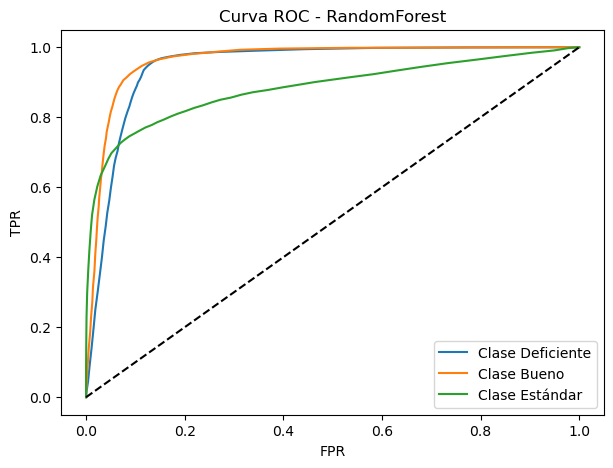

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Nos traemos los mejores modelos
model_names = [name for name, _ in best_models]

# Primero hay que hacer binarias las etiquetas para ROC/AUC multiclase
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Recorremos los mejores modelos y para cada uno generamos las métricas y gráficas
for name in model_names:
    print(f"\n{name}")
    model = models[name]
    y_pred = model.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Deficiente", "Bueno", "Estándar"],
        yticklabels=["Deficiente", "Bueno", "Estándar"],
    )
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.show()

    # Reporte de clasificación
    print("Reporte de Clasificación:")
    print(
        classification_report(
            y_test, y_pred, target_names=["Deficiente", "Bueno", "Estándar"]
        )
    )

    # ROC/AUC multiclase
    y_pred_proba = None
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    if y_pred_proba is not None:
        if y_pred_proba.shape[1] != y_test_bin.shape[1]:
            y_pred_proba_full = np.zeros_like(y_test_bin, dtype=float)
            for idx, c in enumerate(model.classes_):
                y_pred_proba_full[:, c] = y_pred_proba[:, idx]
            y_pred_proba = y_pred_proba_full
        auc = roc_auc_score(
            y_test_bin, y_pred_proba, average="macro", multi_class="ovr"
        )
        print(f"ROC AUC (macro, OVR): {auc:.4f}")

        # Graficar ROC para cada clase
        plt.figure(figsize=(7, 5))
        for i, label in enumerate(["Deficiente", "Bueno", "Estándar"]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f"Clase {label}")
        plt.plot([0, 1], [0, 1], "k--")
        plt.title(f"Curva ROC - {name}")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.legend()
        plt.show()
    else:
        print("El modelo no soporta predict_proba/decision_function para ROC/AUC.")

### Análisis Comparativo de Modelos:

- En cuanto a rendimiento, los dos modelos tienen buen desempeño de f1 score, entre 0.78 y 0.81.
- Los dos presentan virtualmente los mismo resultados en la matriz de confusión, con una ligera ventaja para el modelo de Random Forest.
- Los dos modelos tienen casi la misma curva ROC, con un AUC de 0.9277 para el Bagging y 0.9303 para el Random Forest.
- El bagging se usa mas para evitar el sobreajuste, pero en este caso no se ve una diferencia significativa entre los dos modelos.
- El random forest se usa mas para la interpretabilidad, ya que se pueden ver las variables más importantes y su impacto en el modelo.
- En este caso, el banco quiere un modelo que sea más facil de interpretar y que sea mas robusto ante el sobreajuste. No se quieren arriesgar a un modelo que se sobreajuste y que de información inexacta y que al final le otorguen credito a alguien que nada que ver.


## **III. Modelado de Aprendizaje No Supervisado y Aplicaciones**



### **3.1 Construcción y Justificación de Modelos:**

- Implementa al menos 2 modelos de aprendizaje no supervisado (por ejemplo: K-Means, DBSCAN, Agrupamiento Jerárquico, PCA para reducción de dimensionalidad).

- Describe detalladamente el proceso de construcción de cada modelo (selección de hiperparámetros, justificación de su uso, etc.).

- Justifica la elección de estos algoritmos en el contexto de los datos de crédito.


#### PCA

- **Proceso de Construcción:**
  - Se utilizó PCA para reducir la dimensionalidad de los datos, para detectar patrones subyacentes.
  - Se seleccionó la variable 'credit_score' como objetivo.
  - Al final tenemos de shape (1000, 55) y se explica el 99.9% de la varianza con 55 componentes principales.
- **Justificación:**
  - En este caso, nos ayuda a identificar patrones en los datos de crédito sin perder información significativa.
  - Decidimos usar PCA primero porque no queríamos agrupar los datos luego luego. Primero queríamos ver si había patrones en los datos y si había alguna variable que pudiera ser más importante que otras.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir X como todas las columnas excepto la variable objetivo
X = df.drop(columns=["credit_score"])

pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(100000, 56)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separar variables predictoras y variable objetivo
y = df["credit_score"]
X = df.drop(columns=["credit_score"])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# PCA con 10 componentes
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Modelo más ligero
model_pca = RandomForestClassifier(n_estimators=30, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

#### K Means

- **Proceso de Construcción:**
  - Se utilizó KMeans para segmentar a los clientes en 3 grupos principales, cada uno representa un perfil de riesgo para el banco.
  - Se seleccionó k=3 porque justamente son 3 grupos en los que se clasifican los clientes según su credit_score: deficiente, estándar y bueno.
- **Justificación:**
  - En el contexto del problema con el banco y el crédito, es más fácil identificar y dividir a tus clientes en grupos para así poder saber qué tipo de crédito otorgarle o no otorgarles nada porque son un perfil de alto riesgo. Hace la busqueda más ágil, porque ya no tienes que estar revisando caso por caso, sino que puedes revisar los grupos y ver qué tipo de clientes son y qué tipo de crédito se les puede otorgar.
  - Además, los clusters del credit_score hacen más fácil que al final sean visibles los clusters que deja el kmeans. En este caso pusimos una gráfica que queda muy bien y que se ve claramente la división de los clusters.


In [ ]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=3, random_state=42)
km1.fit(X)

# Predecir los clusters
y_km1 = km1.predict(X)

# Añadimos los clusters al df original
df["Cluster"] = y_km1

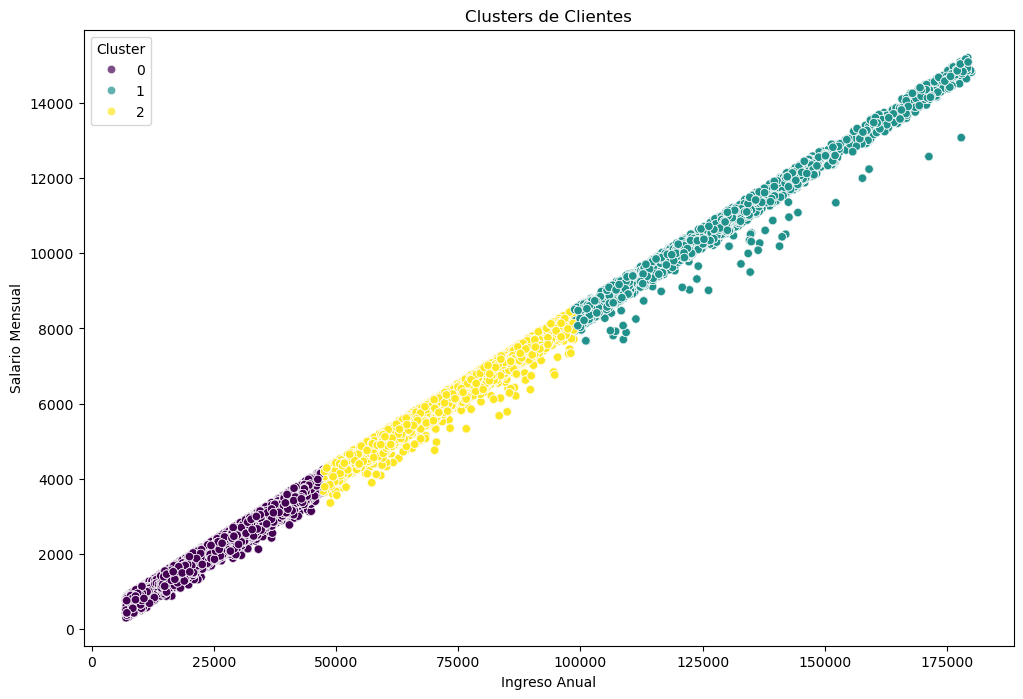

In [47]:
# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="annual_income",
    y="monthly_inhand_salary",
    hue="Cluster",
    palette="viridis",
    alpha=0.7,
)
plt.title("Clusters de Clientes")
plt.xlabel("Ingreso Anual")
plt.ylabel("Salario Mensual")
plt.legend(title="Cluster")
plt.show()

- Después de aplicar el kmeans, se obtuvieron 3 clusters que representan los perfiles de riesgo de los clientes. Estos clusters se pueden utilizar para tomar decisiones informadas sobre la concesión de créditos. Deficiente, estándar y bueno. Se ven claramente en la gráfica de dispersión.


#### DBSCAN

- **Proceso de Construcción:**

  - Como alternativa al KMeans, puedes usar DBSCAN para identificar los 3 clusters que ya vimos.
  - En este caso, no se especifica un número de clusters, sino que se deja que el algoritmo los encuentre por sí mismo. En este caso, puede ser un poco redundante y contraproducente, porque de entrada ya sabemos que hay tres grupos de clasificación, pero igaul creiamos que estaría interesante ver si dbscan encontraba los mismos clusters.
  - Se seleccionaron los hiperparámetros eps=0.5 y min_samples=5 porque son los valores default, y la verdad el dataset no es tan grande como para que se necesiten otros valores.
  - Entrenamos el modelo con todos los datos, y así encontró los clusters al igual que ruido.

- **Justificación:**
  - DBSCAN es útil en el contexto de los créditos porque igual que KMMeans puede identificar los grupos mediante clustering. Tal vez en otros casos donde no se sabe cuáles son los grupos de antemano, DBSCAN puede ser mucho más útil que KMeans.
  - El hecho de que DBSCAN se entrena con todos los datos hace que pueda encontrar outliers. Porque cuando los encuentra, se pueden estudiar esos casos y ver si hay algún fraude o un patrón sospechoso de crédito.


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN para encontrar clusters

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.fit_predict(X)

- Análisis de labels únicos para saber si encontró los mismos clusters que KMeans. 

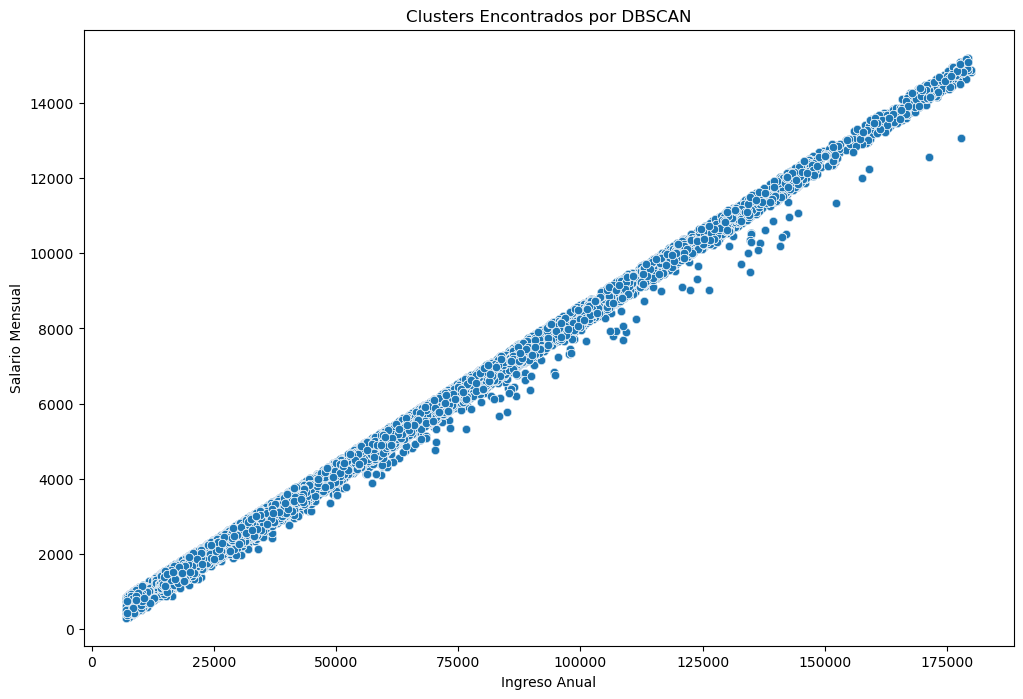

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="annual_income",
    y="monthly_inhand_salary",
    alpha=0.7,
)
plt.title("Clusters Encontrados por DBSCAN")
plt.xlabel("Ingreso Anual")
plt.ylabel("Salario Mensual")
plt.show()

### **3.2 Casos de Uso para la Problemática Bancaria:**

- Para cada modelo no supervisado, especifica cómo podría aplicarse en el contexto de la problemática bancaria y del puntaje crediticio. Piensa en segmentación de clientes, detección de anomalías, reducción de dimensionalidad para visualización o mejora del rendimiento de modelos supervisados.


- **PCA:**
  - **Segmentación de Clientes:** Aunque PCA no segmenta directamente, puede ayudar a identificar patrones en los datos que pueden ser útiles para segmentar clientes.
  - **Reducción de Dimensionalidad:** Elimina el ruido y se enfoca en los grupos y características más relevantes. En este caso, mejora el rendimiento, pero al mismo tiempo no te da algún tipo de insight si es que hay fraude o personas con perfil muy riesgoso.
- **K-Means:**
  - **Segmentación de Clientes:** Permite agrupar a los clientes en segmentos basados en sus características financieras, facilitando la identificación de perfiles de riesgo. Y es muy eficiente.
- **DBSCAN:**
  - **Outliers:** Identifica outliers (clientes) que se desvían significativamente del comportamiento normal, lo que puede indicar fraude o algo así.
  - **Segmentación de Clientes:** Igual que K-Means, si no sabes cuales son los grupos de antemano, DBSCAN puede ayudarte a identificar los grupos de clientes sin necesidad de especificar el número de clusters.


### **3.3 Evaluación de Modelos No Supervisados:**

- Evalúa tus modelos utilizando métricas de validación de clusters (como el coeficiente de silueta, método del codo) o métodos de inspección manual (como visualizaciones de clusters, análisis de centroides) según sea apropiado para cada algoritmo.


#### **Evaluación PCA**

In [ ]:
print("Reporte de clasificación para el modelo PCA:")
print(classification_report(y_test, y_pred_pca))

Reporte de clasificación para el modelo PCA:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      5799
           1       0.75      0.71      0.73      3566
           2       0.80      0.80      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



#### **Evaluación KMeans**

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el silhoutte  para los clusters encontrados
silhouette = silhouette_score(X, y_km1)
print(f"Silhouette Score para KMeans (k=3): {silhouette:.4f}")

Silhouette Score para KMeans (k=3): 0.6402


#### **Evaluación DBSCAN**

In [ ]:
import numpy as np
import pandas as pd


# Obtener etiquetas únicas (excluyendo el ruido, que es -1)
core_labels = [label for label in np.unique(labels) if label != -1]

if core_labels:
    for cluster in core_labels:
        cluster_points = X[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        print(f"Clusters {cluster}:")
        print(pd.Series(centroid, index=X.columns))
        print("\n")
else:
    print("DBSCAN no encontró los mismos clusters.")

DBSCAN no encontró los mismos clusters.


## **IV. Conclusiones Generales**
- Al principio, se realizó un análisis exploratorio de datos (EDA) para entender la distribución de las variables, identificar outliers y correlaciones. Se encontró que la variable objetivo 'credit_score' estaba desbalanceada y que había outliers en varias variables financieras.
- Se definieron los objetivos de la modelación, que eran predecir el puntaje crediticio para identificar perfiles de riesgo y tomar decisiones informadas sobre la concesión de créditos.
- En cuanto a aprendizaje supervisado, el mejor modelo fue el Random Forest porque detalla con más precisión las variables importantes y en este caso del crédito, es menos propenso al sobreajuste y le conviene esto al banco para no tomar decisiones erróneas al otorgar créditos.
- En cuanto a aprendizaje no supervisado, el mejor modelo fue KMeans porque es más eficiente, es más ráído y si permite identificar el perfil de riesgo de los clientes. En este caso fue muy fácil interpretar los resultados en la gráfica de dispersión y ver los clusters que se formaron. Y los resultados fueron muy buenos, ya que se identificaron los 3 grupos de clientes que se esperaban con silhouette score de 0.64. 

## **V. Conclusiones Individuales**

**Leonardo Antonio Espinosa // A01710961**: 

**Adrián Rodríguez González // A01710823**: 

**Andrea Cristina Ramírez Parra // A01749899**: 

**Jorge Emiliano Pomar // A01709338**: 